In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv("lab9.csv")
df

,X1=Acid Durability,X2=Strength,Y=Classification
0,7,7,Bad
1,7,4,Bad
2,3,4,Good
3,1,4,Good
4,4,5,Bad
5,3,5,Good
6,4,6,Bad
7,8,7,Bad
8,7,9,Good
9,8,8,Bad


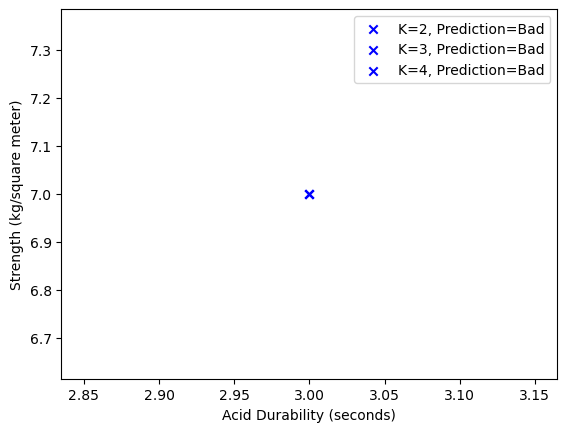

In [19]:
point = (3, 7)
k_values = [2, 3, 4]
for k in k_values:
    distances = []
    for index, row in df.iterrows():
        x1, x2, y = row['X1=Acid Durability'], row['X2=Strength '], row['Y=Classification']
        euclidean_dist = np.sqrt((x1 - point[0]) ** 2 + (x2 - point[1]) ** 2)
        manhattan_dist = abs(x1 - point[0]) + abs(x2 - point[1])
        minkowski_dist = (abs(x1 - point[0]) ** 3 + abs(x2 - point[1]) ** 3) ** (1/3)
        distances.append((euclidean_dist, manhattan_dist, minkowski_dist, y))

    distances.sort()
    nearest_neighbors = distances[:k]
    good_count = sum(1 for _, _, _, label in nearest_neighbors if label == 'Good')
    bad_count = k - good_count

    prediction = 'Good' if good_count > bad_count else 'Bad'

    plt.scatter(point[0], point[1], marker='x', c='blue', label=f'K={k}, Prediction={prediction}')

plt.legend()
plt.xlabel("Acid Durability (seconds)")
plt.ylabel("Strength (kg/square meter)")
plt.show()